In [1]:
import os
import sys

# Go to the root of the project experiments directory
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), "../"))
os.chdir(PROJECT_ROOT)  # THIS sets the working directory permanently

if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)

In [2]:
from utils.report_project_stats import * # Corrected import assuming project root is in sys.path


In [3]:
INTERACTIVE_CHARTS=False

# Different alpha_min and alpha_max settings on CoLA Report

## Alpha min is 0.1, alpha max is 5

Learning rate scheduler is static

Alpha is growing linearly. rank_allocation_weights initialized to random, same scheduling, rank_max is 30, average rank is 20, rank_min is 5. Discrete rank on the last epoch. Constant scheduler for lr

Baseline: 68.08+-1.21
LoRA-XS with rank 25: 68.55+-0.81
Script:
```bash
  python scripts/run_glue_adaptive.py --target_task cola --wandb_disabled False  --seed $SEED \
  --rank_allocation_lr $rank_allocation_lr --epoch 50  --rank_min 5 --rank_max 30 --rank_average 20 --epochs_rank_discrete 1 \
  --lr_scheduler constant_schedule \
  --alpha_min 0.1 --alpha_max 5 
```

| Task   |   Rank Min |   Rank Max |   Alpha Min |   Alpha Max |    LR |   Rank Avg | Median ± Std   |
|:-------|-----------:|-----------:|------------:|------------:|------:|-----------:|:---------------|
| cola   |          5 |         30 |         0.1 |           5 | 0.02  |         20 | 67.70 ± 1.07   |
| cola   |          5 |         30 |         0.1 |           5 | 0.002 |         20 | 67.29 ± 0.61   |
| cola   |          5 |         30 |         0.1 |           5 | 0.01  |         20 | 67.11 ± 1.03   |

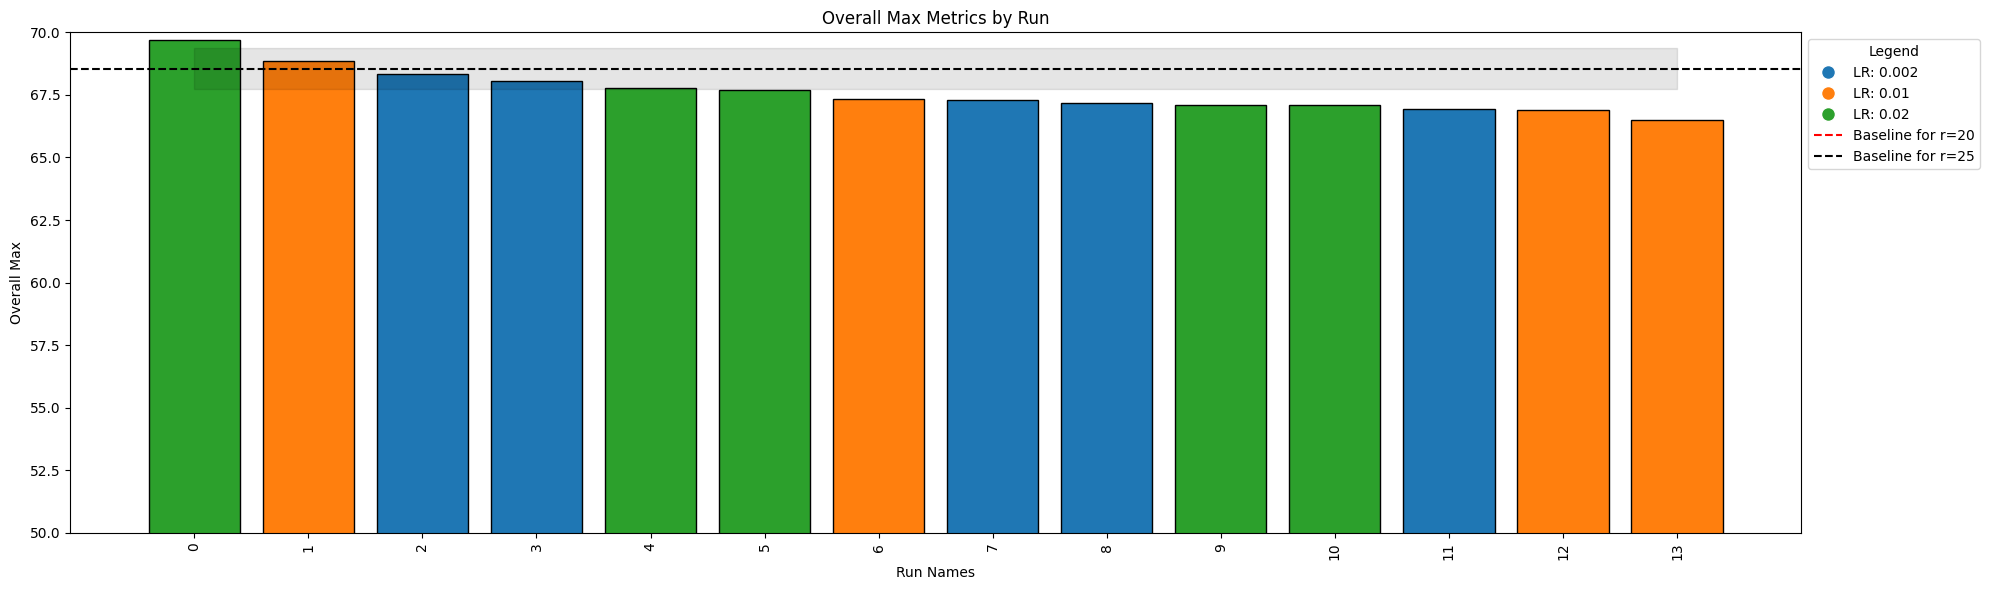

In [8]:
project = "adalora_alpha"
entity = "mallahova"
starts_with="results_cola_5_30_0.1_5"
results_01to5=display_project_stats(project=project, entity=entity, starts_with=starts_with, date_before=datetime(2025,5,11))

The results are slightly below the baseline

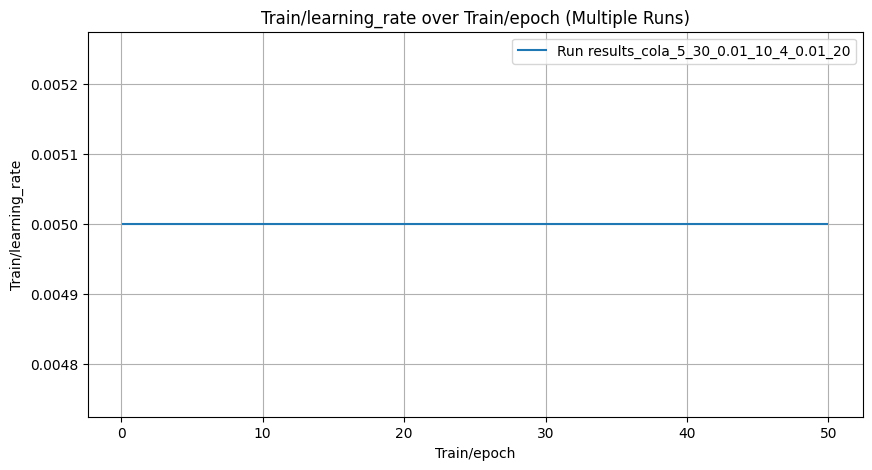

In [10]:
fetch_and_plot_wandb_runs(
    entity="mallahova",
    project="adalora_alpha",
    metric="train/learning_rate",
    x_axis="train/epoch",
    interactive=INTERACTIVE_CHARTS,
    num_runs=1,
    date_before=datetime(2025,5,11)
)

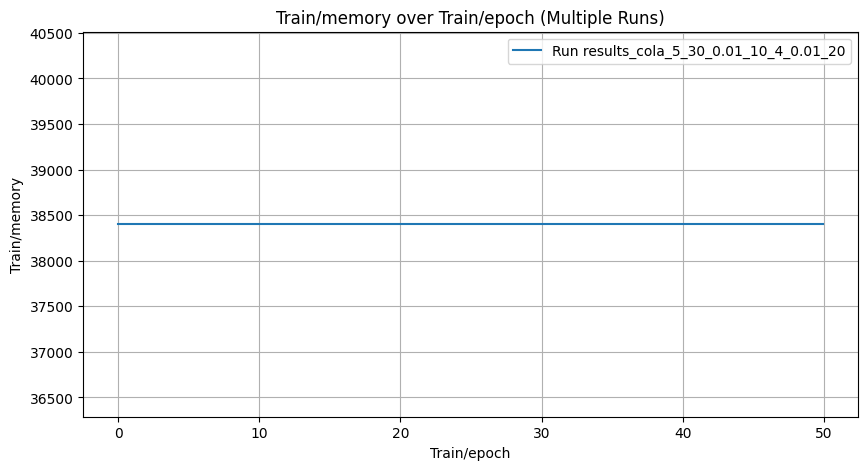

In [11]:
fetch_and_plot_wandb_runs(
    entity="mallahova",
    project="adalora_alpha",
    metric="train/memory",
    x_axis="train/epoch",
    interactive=INTERACTIVE_CHARTS,
    num_runs=1,
    date_before=datetime(2025,5,11)
)

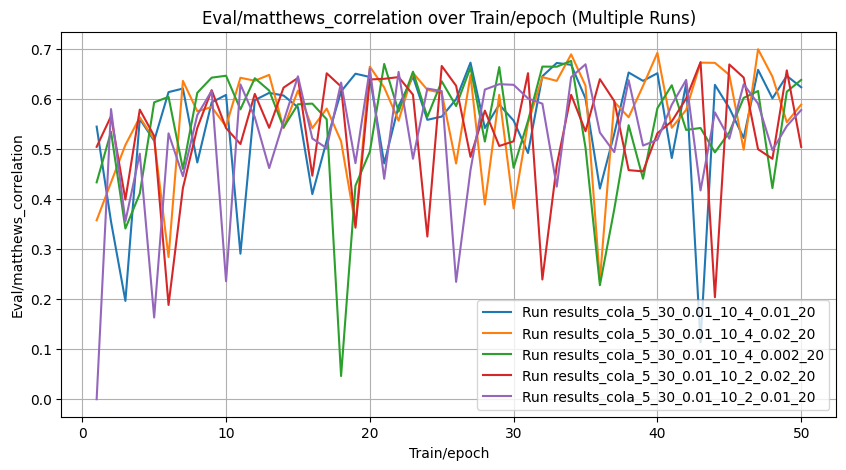

In [12]:
fetch_and_plot_wandb_runs(
    entity="mallahova",
    project="adalora_alpha",
    metric="eval/matthews_correlation",
    x_axis="train/epoch",
    interactive=INTERACTIVE_CHARTS,
    date_before=datetime(2025,5,11)

)

Learning rate scheduler is linear_schedule_with_warmup

| Task   |   Rank Min |   Rank Max |   Alpha Min |   Alpha Max |    LR |   Rank Avg | Median ± Std   |
|:-------|-----------:|-----------:|------------:|------------:|------:|-----------:|:---------------|
| cola   |          5 |         30 |         0.1 |           5 | 0.02  |         20 | 67.85 ± 0.93   |
| cola   |          5 |         30 |         0.1 |           5 | 0.01  |         20 | 67.43 ± 1.27   |
| cola   |          5 |         30 |         0.1 |           5 | 0.002 |         20 | 67.07 ± 1.63   |

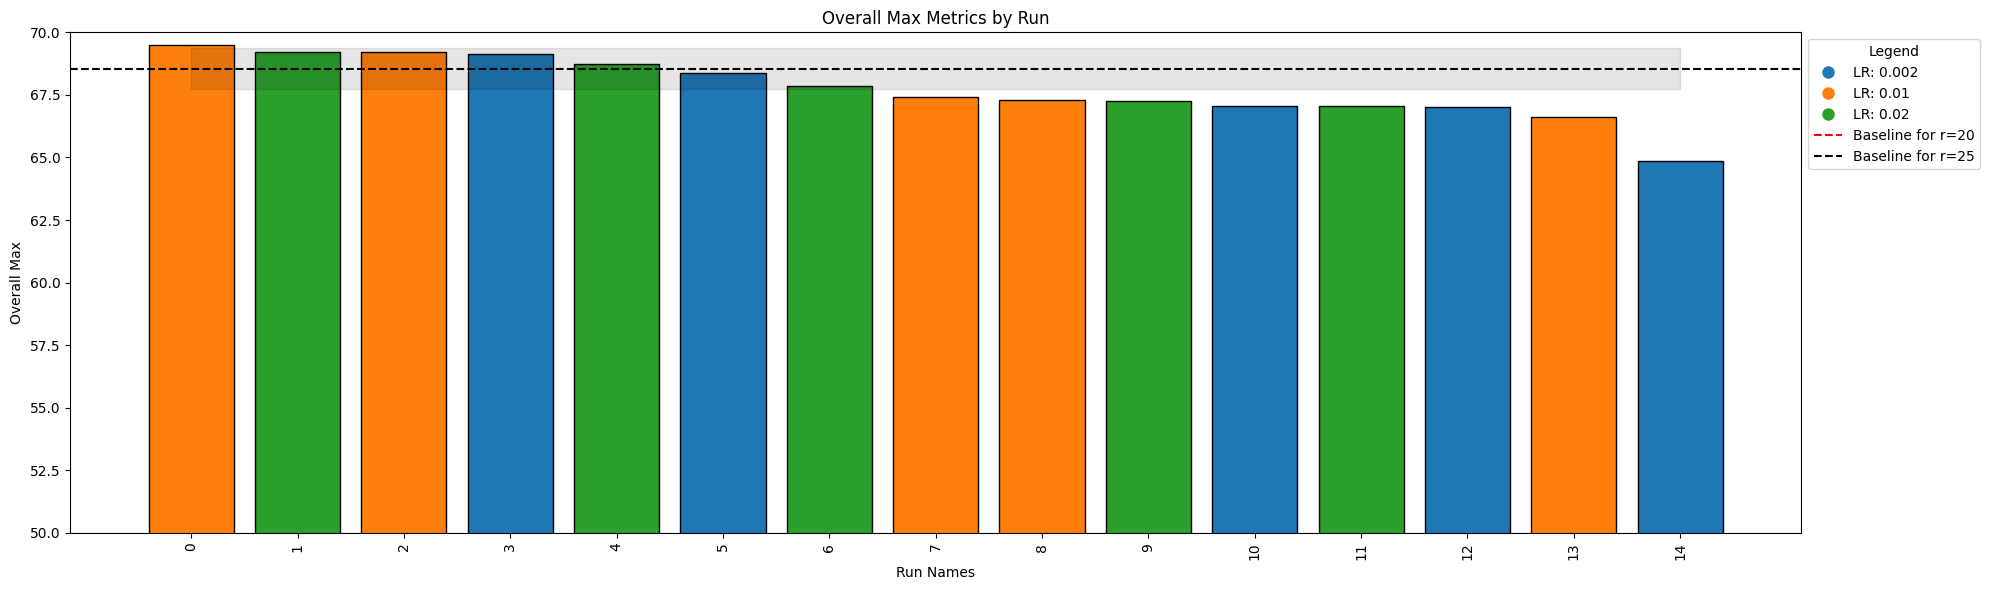

In [13]:
project = "adalora_alpha"
entity = "mallahova"
starts_with="results_cola_5_30_0.1_5"
results_01to5=display_project_stats(project=project, entity=entity, starts_with=starts_with, date_after=datetime(2025,5,11))

The results are slightly below the baseline, but higher compared to constant lr scheduler.

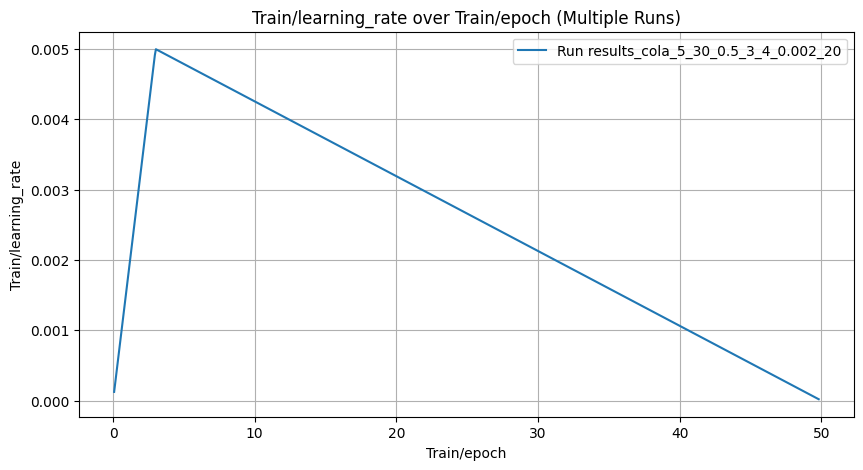

In [14]:
fetch_and_plot_wandb_runs(
    entity="mallahova",
    project="adalora_alpha",
    metric="train/learning_rate",
    x_axis="train/epoch",
    interactive=INTERACTIVE_CHARTS,
    num_runs=1,
    date_after=datetime(2025,5,11)
)

## Alpha min is 0.01, alpha max is 10

Alpha is growing linearly. rank_allocation_weights initialized to random, same scheduling, rank_max is 30, average rank is 20, rank_min is 5. Discrete rank on the last epoch. Constant scheduler for lr

Learning rate scheduler is static

Baseline: 68.08+-1.21
LoRA-XS with rank 25: 68.55+-0.81

Script:
```bash
  python scripts/run_glue_adaptive.py --target_task cola --wandb_disabled False  --seed $SEED \
  --rank_allocation_lr $rank_allocation_lr --epoch 50  --rank_min 5 --rank_max 30 --rank_average 20 --epochs_rank_discrete 1 \
  --lr_scheduler constant_schedule \
  --alpha_min 0.01 --alpha_max 10 
```

| Task   |   Rank Min |   Rank Max |   Alpha Min |   Alpha Max |    LR |   Rank Avg | Median ± Std   |
|:-------|-----------:|-----------:|------------:|------------:|------:|-----------:|:---------------|
| cola   |          5 |         30 |        0.01 |          10 | 0.002 |         20 | 67.60 ± 1.10   |
| cola   |          5 |         30 |        0.01 |          10 | 0.01  |         20 | 66.94 ± 0.96   |
| cola   |          5 |         30 |        0.01 |          10 | 0.02  |         20 | 66.29 ± 1.80   |

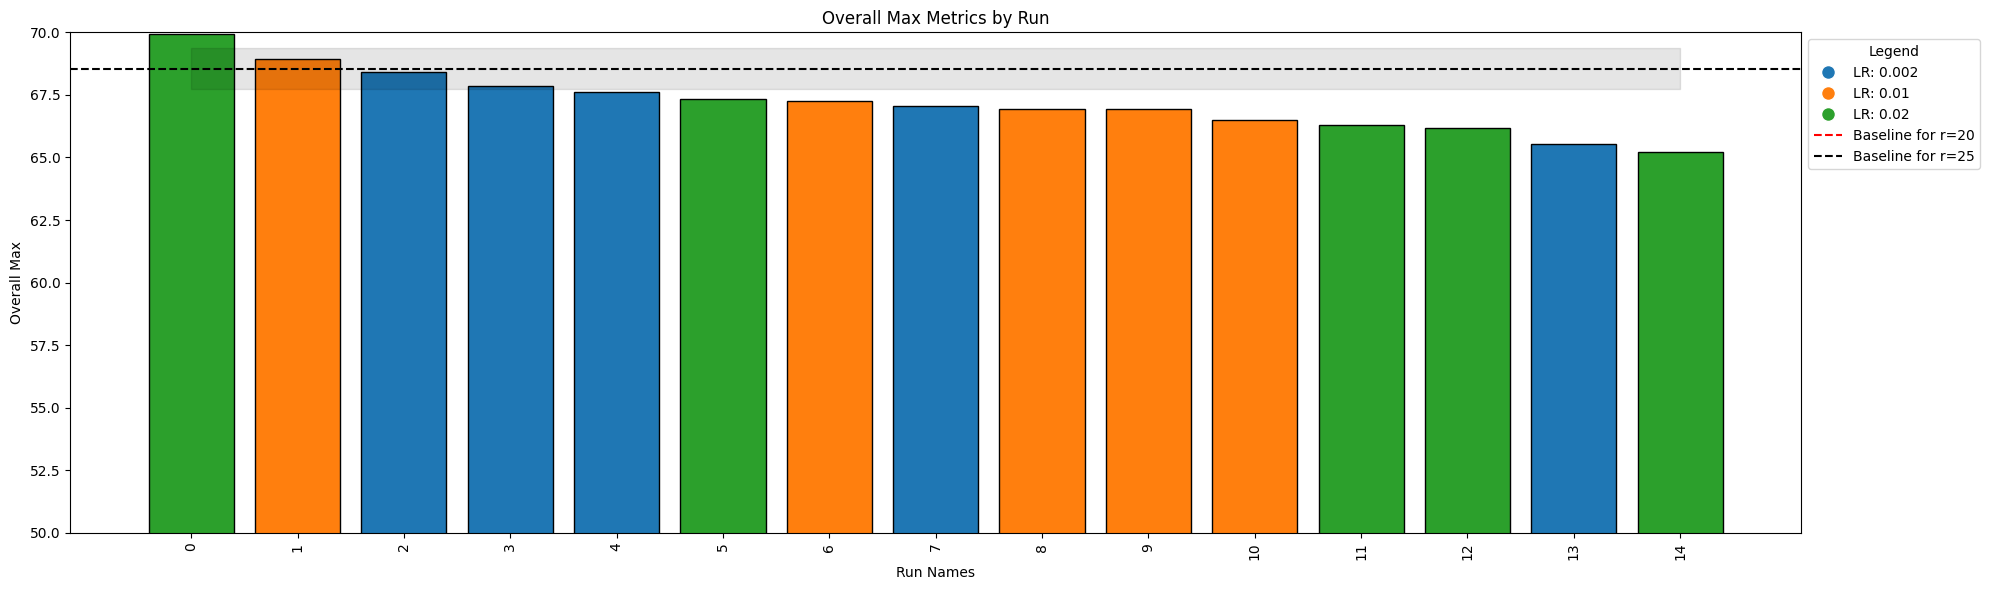

In [15]:
project = "adalora_alpha"
entity = "mallahova"
starts_with="results_cola_5_30_0.01_10"
results_001to10=display_project_stats(project=project, entity=entity, starts_with=starts_with, date_before=datetime(2025,5,11))

The results are slightly below the baseline

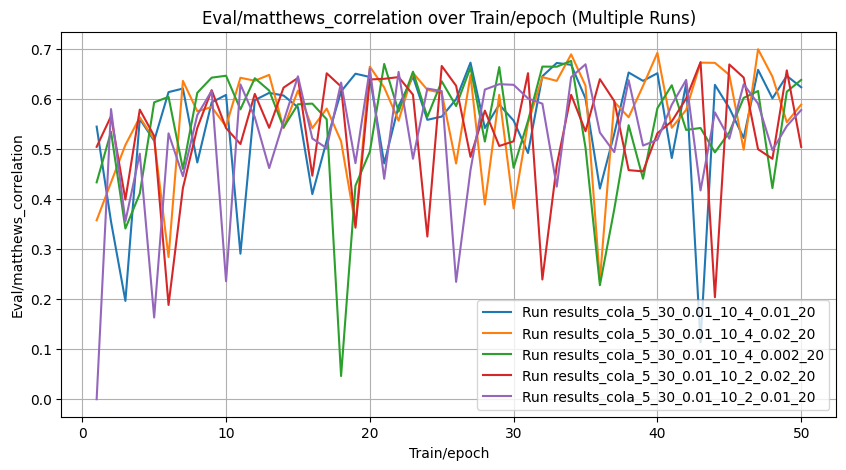

In [16]:
fetch_and_plot_wandb_runs(
    entity="mallahova",
    project=project,
    metric="eval/matthews_correlation",
    x_axis="train/epoch",
    interactive=INTERACTIVE_CHARTS,
    date_before=datetime(2025,5,11)
)

Learning rate scheduler is linear with warmup

| Task   |   Rank Min |   Rank Max |   Alpha Min |   Alpha Max |    LR |   Rank Avg | Median ± Std   |
|:-------|-----------:|-----------:|------------:|------------:|------:|-----------:|:---------------|
| cola   |          5 |         30 |        0.01 |          10 | 0.02  |         20 | 67.84 ± 0.55   |
| cola   |          5 |         30 |        0.01 |          10 | 0.01  |         20 | 67.77 ± 0.57   |
| cola   |          5 |         30 |        0.01 |          10 | 0.002 |         20 | 67.45 ± 0.73   |

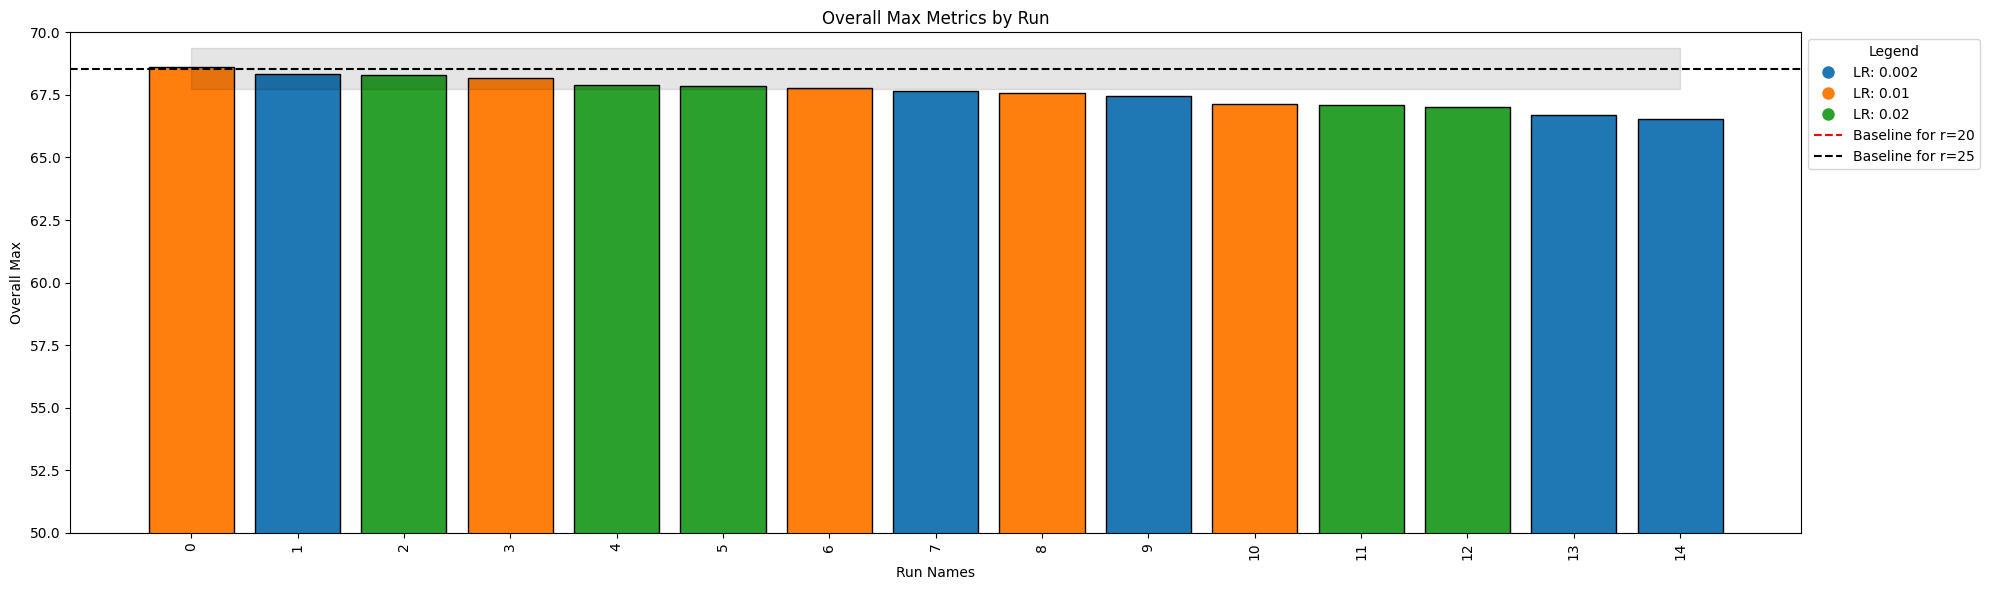

In [17]:
project = "adalora_alpha"
entity = "mallahova"
starts_with="results_cola_5_30_0.01_10"
results_001to10=display_project_stats(project=project, entity=entity, starts_with=starts_with, date_after=datetime(2025,5,11))

The results are slightly below the baseline, but higher compared to constant lr scheduler.

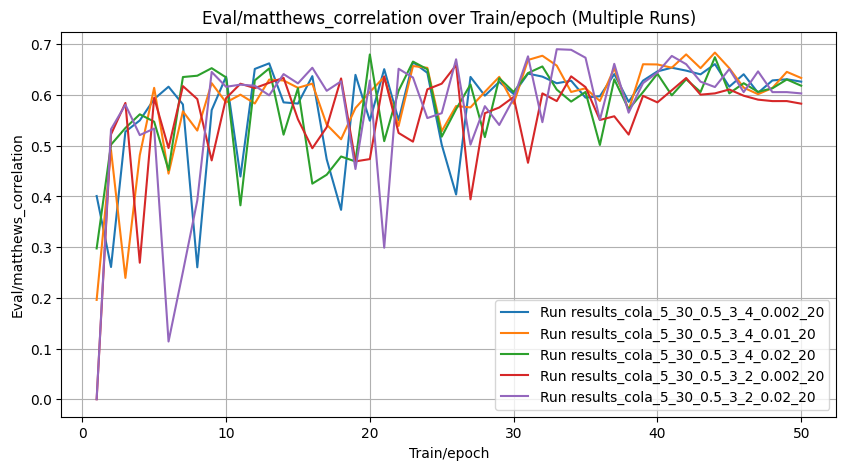

In [18]:
fetch_and_plot_wandb_runs(
    entity="mallahova",
    project=project,
    metric="eval/matthews_correlation",
    x_axis="train/epoch",
    interactive=INTERACTIVE_CHARTS,
    date_after=datetime(2025,5,11)
)

## Alpha min is 0.5, alpha max is 3 - setup used for most of the experiments

Alpha is growing linearly. rank_allocation_weights initialized to random, same scheduling, rank_max is 30, average rank is 20, rank_min is 5. Discrete rank on the last epoch.

Learning rate scheduler is static

Baseline: 68.08+-1.21
LoRA-XS with rank 25: 68.55+-0.81

Script:
```bash
  python scripts/run_glue_adaptive.py --target_task cola --wandb_disabled False  --seed $SEED \
  --rank_allocation_lr $rank_allocation_lr --epoch 50  --rank_min 5 --rank_max 30 --rank_average 20 --epochs_rank_discrete 1 \
  --lr_scheduler constant_schedule \
  --alpha_min 0.5 --alpha_max 3
```

| Task   |   Rank Min |   Rank Max |   Alpha Min |   Alpha Max |    LR |   Rank Avg | Median ± Std   |
|:-------|-----------:|-----------:|------------:|------------:|------:|-----------:|:---------------|
| cola   |          5 |         30 |         0.5 |           3 | 0.01  |         20 | 68.19 ± 1.03   |
| cola   |          5 |         30 |         0.5 |           3 | 0.02  |         20 | 67.39 ± 1.14   |
| cola   |          5 |         30 |         0.5 |           3 | 0.002 |         20 | 67.07 ± 1.13   |

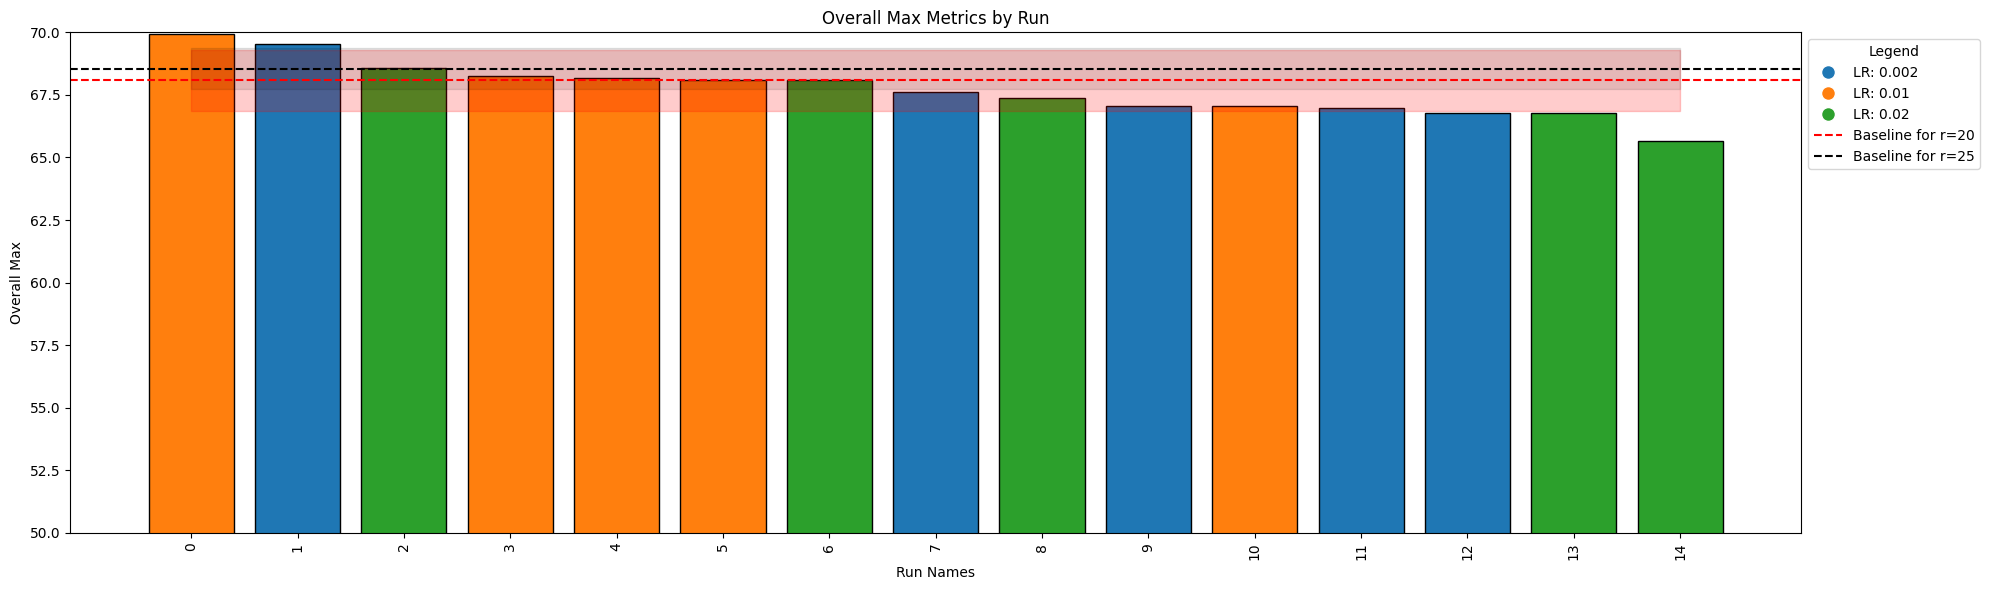

In [4]:
project = "adalora_constant_scheduler"
entity = "mallahova"
starts_with="results_cola_5_30_0.5_3"
results_05to3=display_project_stats(project=project, entity=entity, starts_with=starts_with, date_before=datetime(2025,5,11))

The results are above the baseline by 0.11! However, the results for same alphas but rank max=25 and non constant linear scheduler are higher - 68.22 ± 1.05. See `tasks/adaptive_rank_allocation/lr/initializations_l_r/initializations_l_r_report.md`

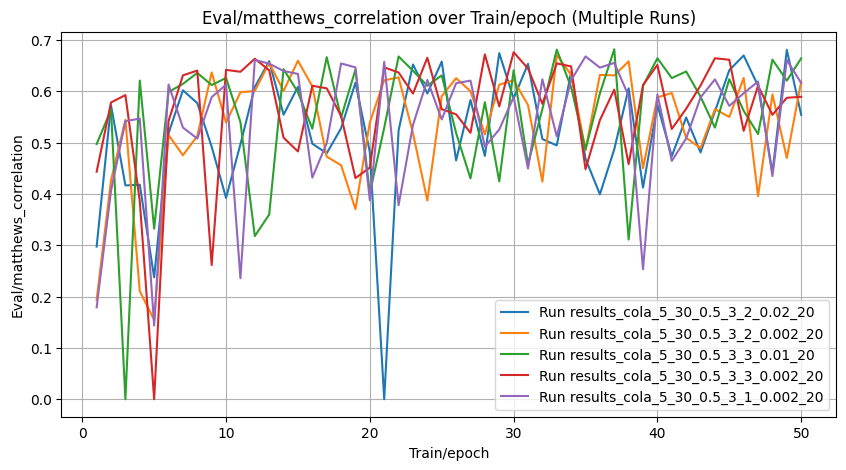

In [ ]:
fetch_and_plot_wandb_runs(
    entity="mallahova",
    project="adalora_constant_scheduler",
    metric="eval/matthews_correlation",
    x_axis="train/epoch",
    interactive=INTERACTIVE_CHARTS,
    date_before=datetime(2025,5,11)

)

Learning rate scheduler is linear with warmup

| Task   |   Rank Min |   Rank Max |   Alpha Min |   Alpha Max |    LR |   Rank Avg | Median ± Std   |
|:-------|-----------:|-----------:|------------:|------------:|------:|-----------:|:---------------|
| cola   |          5 |         30 |         0.5 |           3 | 0.02  |         20 | 68.20 ± 0.50   |
| cola   |          5 |         30 |         0.5 |           3 | 0.01  |         20 | 68.00 ± 0.82   |
| cola   |          5 |         30 |         0.5 |           3 | 0.002 |         20 | 67.13 ± 0.96   |

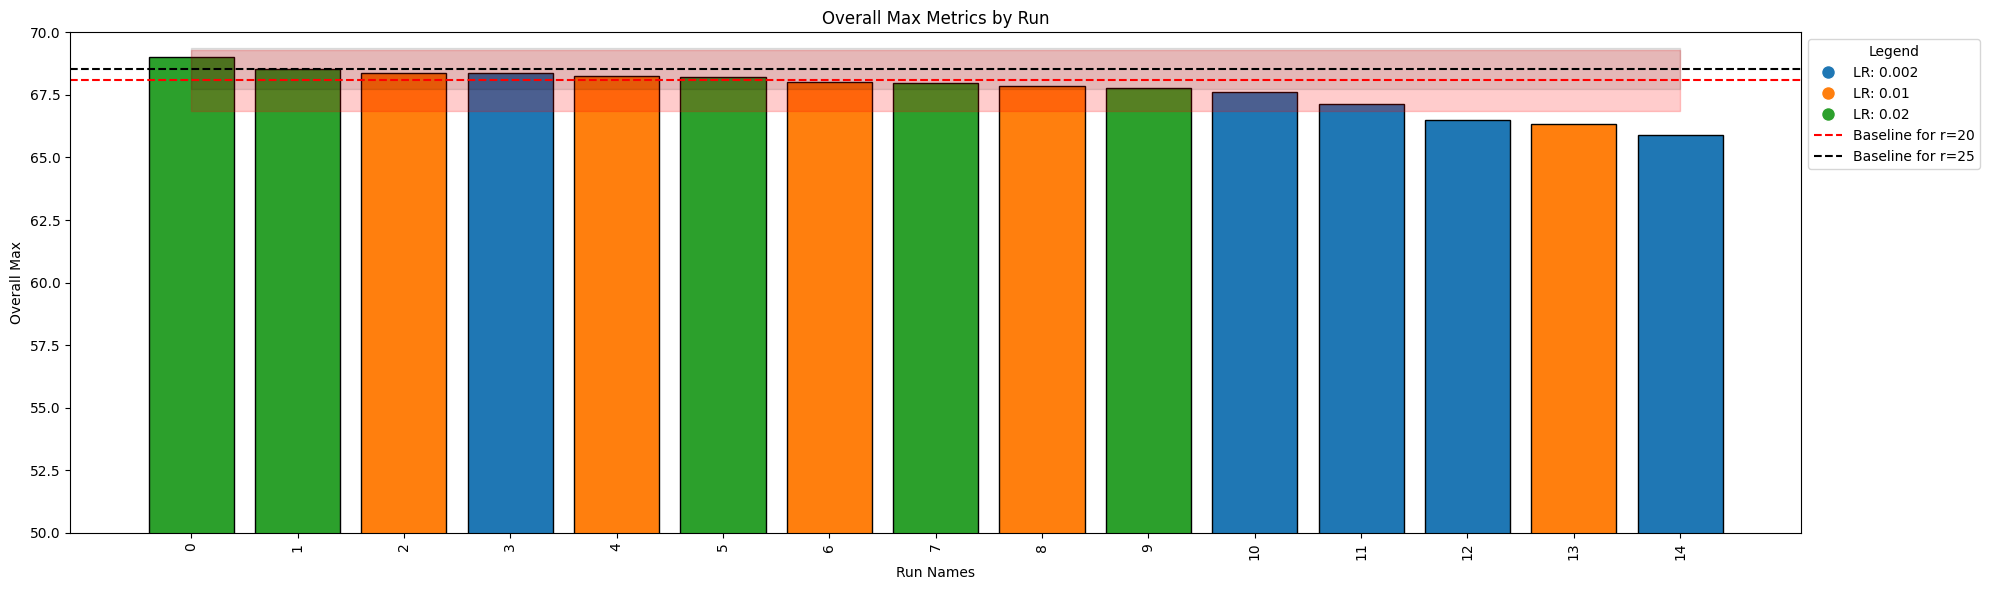

In [6]:
project = "adalora_alpha"
entity = "mallahova"
starts_with="results_cola_5_30_0.5_3"
results_05to3=display_project_stats(project=project, entity=entity, starts_with=starts_with, date_after=datetime(2025,5,11))

The results are above the baseline by 0.12! However, the results for same alphas but rank max=25 and non constant linear scheduler are higher - 68.22 ± 1.05. See `tasks/adaptive_rank_allocation/lr/initializations_l_r/initializations_l_r_report.md`

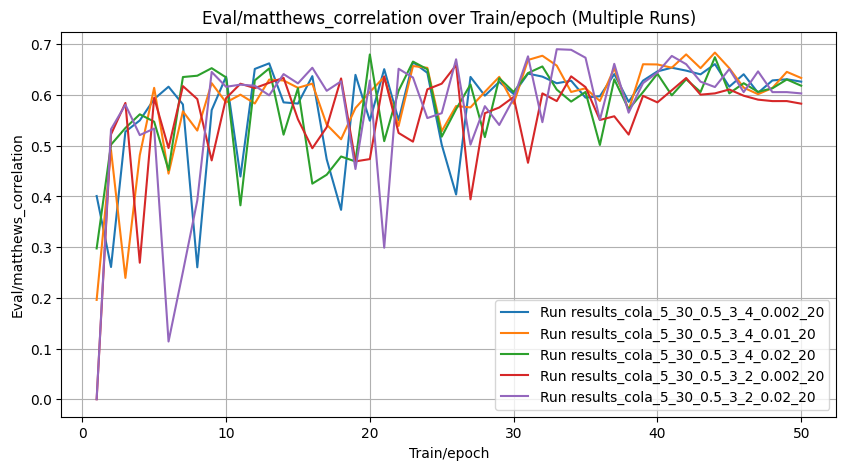

In [24]:
fetch_and_plot_wandb_runs(
    entity="mallahova",
    project="adalora_alpha",
    metric="eval/matthews_correlation",
    x_axis="train/epoch",
    interactive=INTERACTIVE_CHARTS,
    date_after=datetime(2025,5,11)

)

## Conclusion
1. The alpha range of 0.5 to 3 continues to yield the best performance overall.

2. The linear learning rate scheduler with warm-up remains the most effective strategy.

3. The current best results were achieved using alpha from 0.5 to 3, rank_max = 25, and the linear scheduler with warm-up. This configuration outperforms previous setups by 0.14, reaching 68.22 ± 1.05.

For details, refer to the report at `tasks/adaptive_rank_allocation/lr/initializations_l_r/initializations_l_r_report.md`.

